In [1]:
import pandas as pd

df = pd.read_csv('IHME_GBD_2019_SMOKING_TOB_1990_2019_NUM_SMOKERS_Y2021M05D27.CSV')

print(df.head())


        measure_name  location_id location_name  sex_id sex_name  \
0  Number of Smokers            1        Global       1     Male   
1  Number of Smokers            1        Global       2   Female   
2  Number of Smokers            1        Global       3     Both   
3  Number of Smokers            1        Global       1     Male   
4  Number of Smokers            1        Global       2   Female   

   age_group_id age_group_name  year_id          val         upper  \
0            29      15+ years     1990  803101467.1  8.096221e+08   
1            29      15+ years     1990  189148834.0  1.930929e+08   
2            29      15+ years     1990  992250301.2  1.000161e+09   
3            29      15+ years     1991  813897216.4  8.200339e+08   
4            29      15+ years     1991  190537545.1  1.944249e+08   

         lower  
0  795908635.8  
1  185559469.9  
2  984788043.8  
3  806951447.9  
4  186974424.5  


In [2]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20970 entries, 0 to 20969
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   measure_name    20970 non-null  object 
 1   location_id     20970 non-null  int64  
 2   location_name   20970 non-null  object 
 3   sex_id          20970 non-null  int64  
 4   sex_name        20970 non-null  object 
 5   age_group_id    20970 non-null  int64  
 6   age_group_name  20970 non-null  object 
 7   year_id         20970 non-null  int64  
 8   val             20970 non-null  float64
 9   upper           20970 non-null  float64
 10  lower           20970 non-null  float64
dtypes: float64(3), int64(4), object(4)
memory usage: 1.8+ MB
None


In [3]:
print(df.describe())

        location_id        sex_id  age_group_id       year_id           val  \
count  20970.000000  20970.000000       20970.0  20970.000000  2.097000e+04   
mean     131.111588      2.000000          29.0   2004.500000  1.242807e+07   
std       95.055111      0.816516           0.0      8.655648  6.489191e+07   
min        1.000000      1.000000          29.0   1990.000000  6.345717e+01   
25%       61.000000      1.000000          29.0   1997.000000  8.201065e+04   
50%      119.000000      2.000000          29.0   2004.500000  5.777123e+05   
75%      177.000000      3.000000          29.0   2012.000000  2.901197e+06   
max      522.000000      3.000000          29.0   2019.000000  1.144819e+09   

              upper         lower  
count  2.097000e+04  2.097000e+04  
mean   1.269088e+07  1.217241e+07  
std    6.555971e+07  6.421446e+07  
min    7.868296e+01  5.029157e+01  
25%    9.576943e+04  6.875439e+04  
50%    6.278332e+05  5.329521e+05  
75%    3.070281e+06  2.742651e+06  


In [4]:
mean_val = df['val'].mean()
print(f'średnia ilość palaczy to {mean_val}')

mediane_yearid = df['year_id'].median()
print(f'mediana wieku id to {mediane_yearid}')

std_yearid = df['year_id'].std()
print(f'odchylenie standardowe wieku id to {std_yearid}')



średnia ilość palaczy to 12428071.383604305
mediana wieku id to 2004.5
odchylenie standardowe wieku id to 8.65564783254382


In [5]:
missing_values = df.isnull().sum()
print("Brakujące wartości w kazdej kolumnie:")
print(missing_values)

Brakujące wartości w kazdej kolumnie:
measure_name      0
location_id       0
location_name     0
sex_id            0
sex_name          0
age_group_id      0
age_group_name    0
year_id           0
val               0
upper             0
lower             0
dtype: int64


In [6]:
df['sex_id'].fillna(int(df['sex_id'].mean()), inplace=True)

In [7]:
df.dropna(subset=['val'], inplace = True)

In [8]:
Q1 = df['val'].quantile(0.25)
Q3 = df['val'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['val'] < (Q1 - 1.5 * IQR)) | (df['val'] < (Q3 + 1.5 * IQR))]
print("wartości odstające:")
print(outliers)

wartości odstające:
            measure_name  location_id                          location_name  \
360    Number of Smokers            7  Democratic People's Republic of Korea   
361    Number of Smokers            7  Democratic People's Republic of Korea   
362    Number of Smokers            7  Democratic People's Republic of Korea   
363    Number of Smokers            7  Democratic People's Republic of Korea   
364    Number of Smokers            7  Democratic People's Republic of Korea   
...                  ...          ...                                    ...   
20965  Number of Smokers          522                                  Sudan   
20966  Number of Smokers          522                                  Sudan   
20967  Number of Smokers          522                                  Sudan   
20968  Number of Smokers          522                                  Sudan   
20969  Number of Smokers          522                                  Sudan   

       sex_id sex_n

macierz korelacji:
               location_id        sex_id  age_group_id       year_id  \
location_id   1.000000e+00  4.129324e-15           NaN -5.810115e-13   
sex_id        4.129324e-15  1.000000e+00           NaN -4.450544e-17   
age_group_id           NaN           NaN           NaN           NaN   
year_id      -5.810115e-13 -4.450544e-17           NaN  1.000000e+00   
val          -1.592398e-01  2.164982e-02           NaN  7.720502e-03   
upper        -1.597180e-01  2.181495e-02           NaN  8.004704e-03   
lower        -1.587740e-01  2.148802e-02           NaN  7.421082e-03   

                   val     upper     lower  
location_id  -0.159240 -0.159718 -0.158774  
sex_id        0.021650  0.021815  0.021488  
age_group_id       NaN       NaN       NaN  
year_id       0.007721  0.008005  0.007421  
val           1.000000  0.999976  0.999977  
upper         0.999976  1.000000  0.999907  
lower         0.999977  0.999907  1.000000  


<Axes: xlabel='lower', ylabel='upper'>

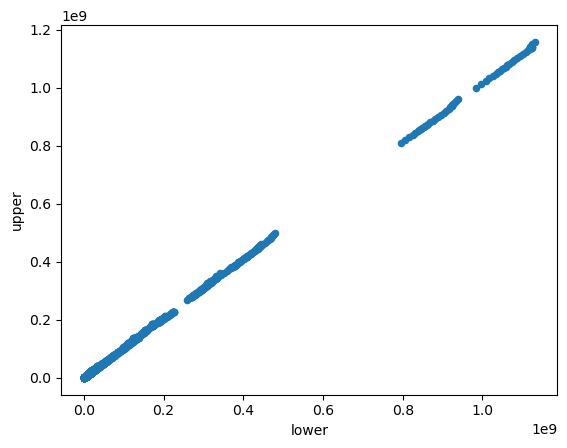

In [9]:
correlation_matrix = df.corr(numeric_only = True)
print("macierz korelacji:")
print(correlation_matrix)

df.plot.scatter(x='lower',y='upper')

In [10]:
df['LowerRangeTolerance']=df['lower'] - df['val']
print(df)

            measure_name  location_id location_name  sex_id sex_name  \
0      Number of Smokers            1        Global       1     Male   
1      Number of Smokers            1        Global       2   Female   
2      Number of Smokers            1        Global       3     Both   
3      Number of Smokers            1        Global       1     Male   
4      Number of Smokers            1        Global       2   Female   
...                  ...          ...           ...     ...      ...   
20965  Number of Smokers          522         Sudan       2   Female   
20966  Number of Smokers          522         Sudan       3     Both   
20967  Number of Smokers          522         Sudan       1     Male   
20968  Number of Smokers          522         Sudan       2   Female   
20969  Number of Smokers          522         Sudan       3     Both   

       age_group_id age_group_name  year_id           val         upper  \
0                29      15+ years     1990  8.031015e+08  8

In [11]:
grouped = df.groupby('location_name')['val'].mean()
grouped

location_name
Afghanistan                   7.178958e+05
Albania                       4.011131e+05
Algeria                       2.582208e+06
American Samoa                8.169698e+03
Andean Latin America          2.377826e+06
                                  ...     
Western Europe                6.476573e+07
Western Sub-Saharan Africa    9.184475e+06
Yemen                         1.488955e+06
Zambia                        6.662353e+05
Zimbabwe                      7.167678e+05
Name: val, Length: 231, dtype: float64

In [12]:
df_sorted = df.sort_values(by='val')
df_sorted.head(20)

,measure_name,location_id,location_name,sex_id,sex_name,age_group_id,age_group_name,year_id,val,upper,lower,LowerRangeTolerance
20572,Number of Smokers,413,Tokelau,2,Female,29,15+ years,2007,63.457166,78.682957,50.291565,-13.165601
20575,Number of Smokers,413,Tokelau,2,Female,29,15+ years,2008,63.730688,79.472611,50.462818,-13.267870
20569,Number of Smokers,413,Tokelau,2,Female,29,15+ years,2006,64.929999,80.772113,51.303621,-13.626377
20578,Number of Smokers,413,Tokelau,2,Female,29,15+ years,2009,65.197998,81.576212,51.185326,-14.012673
20581,Number of Smokers,413,Tokelau,2,Female,29,15+ years,2010,67.277366,83.817868,52.910362,-14.367005
20566,Number of Smokers,413,Tokelau,2,Female,29,15+ years,2005,68.832209,86.262158,54.075288,-14.756921
20584,Number of Smokers,413,Tokelau,2,Female,29,15+ years,2011,68.910776,85.482803,54.302381,-14.608395
20587,Number of Smokers,413,Tokelau,2,Female,29,15+ years,2012,69.935769,86.894159,55.018949,-14.916820
20590,Number of Smokers,413,Tokelau,2,Female,29,15+ years,2013,70.365558,88.023339,54.985971,-15.379587
20593,Number of Smokers,413,Tokelau,2,Female,29,15+ years,2014,70.913538,88.504042,55.650310,-15.263229
